In [1]:
import torch
import torchvision 
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='/data',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.51MB/s]


In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='/data',train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

Label 5


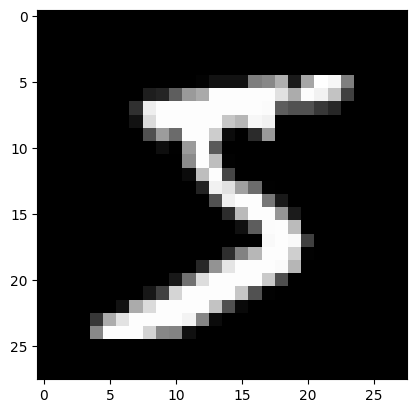

In [7]:
image , label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label',label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset=MNIST(root='/data',train=True,transform=transforms.ToTensor())

In [10]:
img_tensor , label=dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


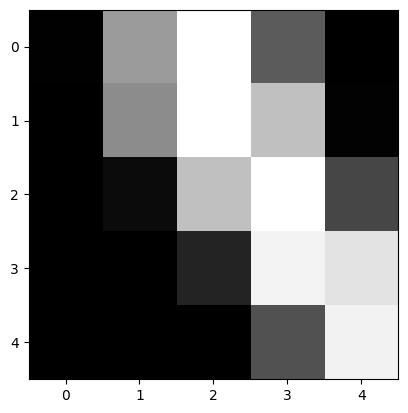

In [15]:
plt.imshow(img_tensor[0,10:15,10:15] , cmap='gray');

In [18]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader

batch_size=128

train_loader=DataLoader(train_ds , batch_size , shuffle=True)
val_loader= DataLoader(val_ds , batch_size)

In [20]:
import torch.nn as nn
input_size=28*28
num_classes=10

model=nn.Linear(input_size , num_classes)

In [22]:
print(model.weight.shape)
print(model.weight.ndim)
model.weight

torch.Size([10, 784])
2


Parameter containing:
tensor([[ 0.0258, -0.0179,  0.0081,  ..., -0.0296,  0.0152,  0.0271],
        [ 0.0231,  0.0094,  0.0346,  ...,  0.0162,  0.0342,  0.0312],
        [-0.0140, -0.0346,  0.0057,  ..., -0.0294, -0.0131,  0.0236],
        ...,
        [-0.0244, -0.0140, -0.0317,  ..., -0.0065, -0.0075,  0.0194],
        [-0.0042, -0.0063, -0.0063,  ..., -0.0197,  0.0336, -0.0100],
        [-0.0082,  0.0240,  0.0175,  ..., -0.0056,  0.0120, -0.0258]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0015,  0.0329,  0.0338,  0.0090,  0.0323,  0.0229, -0.0128,  0.0113,
        -0.0182, -0.0188], requires_grad=True)

In [25]:
for images , labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images)
    print(outputs)
    break

tensor([1, 2, 4, 6, 7, 2, 6, 9, 6, 3, 1, 2, 4, 8, 1, 2, 1, 5, 1, 4, 6, 6, 4, 4,
        9, 7, 6, 4, 7, 8, 1, 5, 1, 9, 2, 7, 5, 8, 5, 4, 6, 4, 0, 9, 3, 6, 9, 3,
        1, 0, 6, 9, 3, 3, 9, 7, 5, 8, 4, 2, 2, 3, 5, 8, 4, 0, 6, 9, 7, 4, 2, 5,
        8, 5, 4, 1, 1, 6, 8, 0, 1, 5, 8, 7, 4, 9, 6, 4, 5, 9, 5, 7, 7, 9, 5, 3,
        8, 9, 6, 7, 7, 3, 3, 1, 4, 6, 1, 6, 2, 1, 2, 9, 6, 4, 1, 6, 9, 0, 7, 0,
        5, 6, 1, 7, 7, 7, 8, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [26]:
images.shape

torch.Size([128, 1, 28, 28])

In [28]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [29]:
class person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say_hello(self):
        print("Hello my name is "+ self.name+"!")


In [30]:
bob = person("Bob" ,32)

In [31]:
bob.name , bob.age

('Bob', 32)

In [32]:
bob.say_hello()

Hello my name is Bob!


In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size , num_classes)

    def forward(self, xb):
        xb=xb.reshape(-1 , 784)
        out=self.linear(xb)
        return out


model=MnistModel()

In [36]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [37]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0275, -0.0245, -0.0335,  ...,  0.0293,  0.0220,  0.0126],
         [ 0.0321,  0.0165, -0.0093,  ...,  0.0347,  0.0299, -0.0315],
         [ 0.0207, -0.0103,  0.0072,  ..., -0.0287, -0.0220,  0.0297],
         ...,
         [-0.0327,  0.0143,  0.0286,  ...,  0.0280, -0.0036,  0.0315],
         [ 0.0228, -0.0227,  0.0076,  ..., -0.0319,  0.0107,  0.0222],
         [ 0.0232, -0.0198,  0.0216,  ...,  0.0042,  0.0356, -0.0217]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0307, -0.0298,  0.0076,  0.0211,  0.0167,  0.0010, -0.0298,  0.0163,
         -0.0352,  0.0105], requires_grad=True)]

In [38]:
for images, labels in train_loader:
    outputs= model(images)
    break

print('output.shape: ', outputs.shape)
print('Sample Outputs: ', outputs[:2].data)

output.shape:  torch.Size([128, 10])
Sample Outputs:  tensor([[-0.0935,  0.0306, -0.1611,  0.4374,  0.2795, -0.0228, -0.3947, -0.1382,
         -0.5889, -0.0184],
        [-0.2332,  0.0573,  0.1740,  0.0074,  0.1149,  0.0917, -0.2261,  0.0473,
         -0.1120, -0.0293]])


In [39]:
import torch.nn.functional as F

In [40]:
outputs[:2]

tensor([[-0.0935,  0.0306, -0.1611,  0.4374,  0.2795, -0.0228, -0.3947, -0.1382,
         -0.5889, -0.0184],
        [-0.2332,  0.0573,  0.1740,  0.0074,  0.1149,  0.0917, -0.2261,  0.0473,
         -0.1120, -0.0293]], grad_fn=<SliceBackward0>)

In [41]:
probs=F.softmax(outputs, dim=1)
print("Sample Probabilities:\n", probs[:2].data)
print("Sum:", torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0937, 0.1060, 0.0875, 0.1593, 0.1360, 0.1005, 0.0693, 0.0896, 0.0571,
         0.1010],
        [0.0794, 0.1061, 0.1193, 0.1010, 0.1124, 0.1099, 0.0799, 0.1051, 0.0896,
         0.0973]])
Sum: 1.0000001192092896


In [43]:
max_probs , preds =torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 2, 9, 5, 2, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 5, 3, 4, 4, 2, 1, 9,
        9, 9, 5, 4, 5, 4, 4, 4, 4, 1, 1, 4, 4, 3, 9, 5, 5, 7, 5, 7, 4, 4, 5, 4,
        4, 4, 4, 4, 4, 5, 4, 9, 4, 4, 5, 9, 5, 4, 4, 4, 9, 0, 4, 4, 4, 9, 4, 5,
        1, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 2, 5, 5, 9, 5, 4, 4, 5, 4, 4, 0, 4,
        4, 9, 1, 5, 1, 5, 4, 5, 1, 4, 4, 9, 4, 5, 4, 4, 1, 5, 5, 4, 4, 1, 4, 4,
        4, 4, 1, 4, 9, 5, 4, 3])
tensor([0.1593, 0.1193, 0.1198, 0.1150, 0.1235, 0.1378, 0.1248, 0.1271, 0.1611,
        0.1402, 0.1240, 0.1443, 0.1279, 0.1304, 0.1193, 0.1238, 0.1528, 0.1454,
        0.1535, 0.1592, 0.1644, 0.1235, 0.1290, 0.1162, 0.1267, 0.1208, 0.1242,
        0.1261, 0.1255, 0.1347, 0.1685, 0.1310, 0.1219, 0.1531, 0.1280, 0.1379,
        0.1603, 0.1332, 0.1241, 0.1232, 0.1332, 0.1120, 0.1496, 0.1135, 0.1470,
        0.1272, 0.1327, 0.1363, 0.1529, 0.1624, 0.2103, 0.1563, 0.1257, 0.1593,
        0.1433, 0.1388, 0.1312, 0.1899, 0.1391, 0.1249, 0.1213, 0.1402, 0.1402,
       